# Part I - Theory Refresher

### Consider a Markov chain $(X_t)$ with state space $\chi={1,2,...,n}$ and transition matrix P. Define the following object infull generality.

### 1. The invariant distribution of $(X_t)$

Let $\pi = (\pi_1, \pi_2, ..., \pi_{|\chi|})$ be a vector of probabilities. We say that $\pi$ is an invariant distribution for the Markov chain $(X_t)$ with transition matrix $P$ if
$$\pi_j=\sum_{i\in\chi}\pi_iP_{ij}$$
$\forall j\in\chi$

or in matrix form: $\pi P=\pi$

### 2. The limiting distribution of $(X_t)$
Let $\pi = (\pi_1, \pi_2, ..., \pi_{|\chi|})$ be a vector of probabilities. We say that $\pi$ is a limiting distribution for the Markov chain $(X_t)$ with transition matrix $P$ if
$$\pi_j = \lim_{t \rightarrow \infty} P^t{ij}$$


### 3. The asymptotic distribution of $(X_t)$
Let $(X_t)$ be an irreducible (and aperiodic) Markov chain in finite state space $\chi$ and limiting distribution $\pi$. Then:
$$\pi_i = lim_{n \rightarrow \infty} \frac{number \, of \, visits \, of \, (X_t) \, to \, state \, i \, before \, time \, n}{n}$$
$\forall i \in \chi$

### Convergence Theorem

Let $(X_t)$ be an irreductible (and aperiodic) Markov chain in finite state space $\chi$ with transition matrix $P$. Then
$$P^t_{ij} \rightarrow \pi_j \qquad as \qquad t \rightarrow \infty$$
$\forall i,j \in \chi$, where $\pi$ is the (unique) stationary distribution of $(X_t)$
When the convergence theorem holds, we call $\pi$ the limiting distribution of $(X_t)$, and we say that $(X_t)$ coverges to stationarity

# Part II - Computation
### Consider the Markov Chain $(X_t)$ associated with the directed graph reported in the introduction.

### 1. Describe $(X_t)$ by providing its state space $\chi$ and transition matrix $P$. Does $(X_t)$ meet the assumption of the Convergence Theorem?

In [1]:
import numpy as np
import pandas as pd
chi = [1, 2, 3, 4, 5]
P = np.array([ [0,1/3,1/3,1/3,0],
               [0,0,1,0,0],
               [1,0,0,0,0],
               [0,0,0.5,0,0.5],
               [0,0,0,1,0]])
P


array([[0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.        , 1.        , 0.        ]])

$(X_t)$ meets the assumption of the Convergence Theorem, as it is irreducible.

### 2. Compute the invariant/limiting/asymptotic distribution of according to the following three methods:
### i) By finding the suitable normalised left eigenvector of $P$ (invariant distribution method)

In [2]:
# Find left eigenvectors and eigenvalues
eigenvalues, left_eigenvectors = np.linalg.eig(P.T)

# Find the index of the eigenvalue 1 (assuming it exists)
index = np.where(np.isclose(eigenvalues, 1))[0]

# Extract the corresponding left eigenvector
left_eigenvector = left_eigenvectors[:, index].real

# Normalize the left eigenvector
normalized_left_eigenvector = left_eigenvector / np.sum(left_eigenvector)

print("Normalized left eigenvector:", normalized_left_eigenvector)

Normalized left eigenvector: [[0.3]
 [0.1]
 [0.3]
 [0.2]
 [0.1]]


### ii) By computing the distribution of $X_t$, for t large enough and the initial condition $X_0 = 1$. Does the result change if $X_0=5$? (limiting distribution method)

In [3]:
N=10000
X = np.array([1,0,0,0,0])    # X0 = 1
for i in range(N):
    X = X.dot(P)    # apply P to the distribution at t-1
X

array([0.3, 0.1, 0.3, 0.2, 0.1])

In [4]:
X1 = np.array([0,0,0,0,1])    # X0 = 5
for i in range(N):
    X = X.dot(P)    # apply P to the distribution at t-1
X

array([0.3, 0.1, 0.3, 0.2, 0.1])

### iii) By simulating the chain for a long enough time (e.g. $N=1000$ or longer) and compute its asymptotic frequencies. For each asymptotic frequency also propose a suitable plot (cumulative average) to inspect empirically whether the estimated asymptotic frequency has converged. (asymptotic distribution method)

In [5]:
import matplotlib.pyplot as plt

def simulate_markov_chain(transition_matrix, initial_state, steps):
    current_state = initial_state
    state_counts = np.zeros(transition_matrix.shape[0], dtype=int)
    
    for _ in range(steps):
        state_counts[current_state] += 1
        probabilities = transition_matrix[current_state]
        current_state = np.random.choice(len(probabilities), p=probabilities)
    
    return state_counts / steps


def plot_convergence(P, initial_state, N):
    accumulator_df = pd.DataFrame(columns=np.arange(1, len(initial_state) + 1),
                                  index=np.arange(0, N)).fillna(0)
    current_state_idx = initial_state.index(1)
    averages_df = pd.DataFrame()

    for t in range(N):
        accumulator_df.loc[t, current_state_idx] = 1
        new_prob = P[current_state_idx - 1]
        current_state_idx = np.random.choice(np.arange(1, len(initial_state) + 1), p=new_prob)

    for state in accumulator_df.columns:
        averages_df['State ' + str(state)] = accumulator_df[state].cumsum() / (accumulator_df.index + 1)

    for col in averages_df.columns:
        plt.plot(averages_df[col], label=col)

    plt.legend()
    plt.title('Cumulative averages')
    plt.xlabel('# steps')
    plt.ylabel('Average')
    plt.show()

/var/folders/63/8pbgtqg55qj_cy8__l6gg_bw0000gn/T/ipykernel_702/432575574.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  index=np.arange(0, N)).fillna(0)


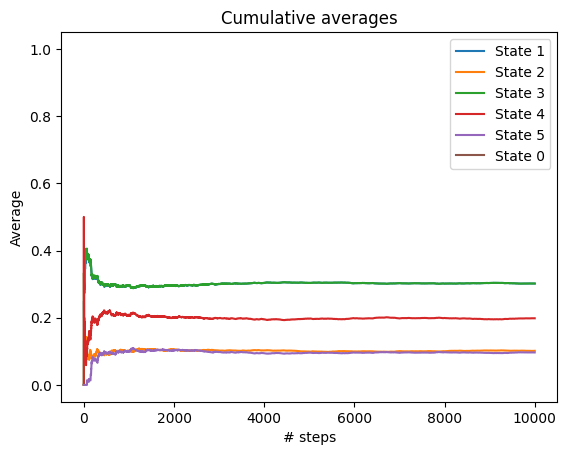

In [6]:
initial_state = [1,0,0,0,0]


plot_convergence(P, initial_state, N)


# Part III - More Computation

### 1. Obtain the PageRank transition matrix associated to the directed network described by "Net". Make sure that the sum of the entries of each row of $P$ sum up to 1 in order to describe a well defined Markov chain $X_t$

In [7]:

#load the Net matrix
Net = pd.read_csv("Net.csv")
Net.drop('Unnamed: 0', axis=1, inplace=True)
Net.index = Net.index +1
Net



,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Count the number of 1s in each row
num_ones_per_row = Net.sum(axis=1)

# Replace 1s with 1 divided by the number of 1s in the row
P = Net.apply(lambda row: row.replace(1, 1 / num_ones_per_row[row.name]) if row.name in num_ones_per_row.index else row, axis=1)

# Check that the sum of every row is equal to 1
P.sum(axis=1)


1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
49    1.0
50    1.0
dtype: float64

### 2. Calculate the asymptotic frequencies of first by setting $X_0=1$ and then by setting $X_0=50$ . Compare and explain thoroughly the result. Does the Convergence Theorem apply to this ($X_t$)?

In [9]:
P = np.array(P)

#with initial state 1
initial_state=0 #it is the index, therefore one less than the state

asymptotic_frequencies = simulate_markov_chain(P, initial_state, N)
print("Asymptotic Frequencies:", asymptotic_frequencies)

Asymptotic Frequencies: [0.0525 0.0198 0.0246 0.0752 0.048  0.0051 0.0021 0.0368 0.0909 0.0257
 0.0308 0.0721 0.0153 0.     0.0342 0.0504 0.0059 0.0047 0.0029 0.0482
 0.0479 0.0318 0.0005 0.0327 0.071  0.0739 0.0146 0.0332 0.0044 0.0448
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]


In [10]:
#with initial state 50
initial_state=49 #it is the index, therefore one less than the state

asymptotic_frequencies = simulate_markov_chain(P, initial_state, N)
print("Asymptotic Frequencies:", asymptotic_frequencies)

Asymptotic Frequencies: [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.0442 0.0503 0.0636 0.     0.0328 0.0754 0.0922 0.0196 0.0208 0.0258
 0.0445 0.0943 0.045  0.0918 0.0157 0.0339 0.0715 0.0731 0.0773 0.0282]


We clearly see that the asymptotic frequencies are not the same if we start from 1 and from 50, therefore the convergence theorem does not hold to this Markov chain.

This means that there are two absorbing states.

### 3. Implement the PageRank algorithm for a suitable choice of $\alpha$. Find and report the ranking of the nodes/pages. Is the the problem highlighted in previous point solved?

In [11]:
alpha = 0.95
n = 50

P_pagerank = P * alpha + (1 - alpha) / n

In [12]:
asymptotic_frequencies = simulate_markov_chain(P_pagerank, initial_state = 1, steps = N)
asymptotic_frequencies

array([0.0333, 0.0109, 0.0141, 0.0461, 0.0285, 0.0044, 0.0027, 0.0209,
       0.0553, 0.0178, 0.0203, 0.0446, 0.0123, 0.001 , 0.0208, 0.0291,
       0.0049, 0.0043, 0.0033, 0.0304, 0.0303, 0.0201, 0.0016, 0.0217,
       0.0422, 0.0442, 0.0111, 0.0199, 0.0034, 0.0281, 0.0155, 0.0174,
       0.0244, 0.0007, 0.0127, 0.0271, 0.0353, 0.0097, 0.0074, 0.0097,
       0.0175, 0.0342, 0.0181, 0.0327, 0.0073, 0.0135, 0.0254, 0.0268,
       0.0273, 0.0097])

In [13]:
asymptotic_frequencies = simulate_markov_chain(P_pagerank, initial_state = 49, steps = N)
asymptotic_frequencies

array([0.0282, 0.0101, 0.0122, 0.0513, 0.0234, 0.0044, 0.0032, 0.0227,
       0.0543, 0.0133, 0.0184, 0.0429, 0.0096, 0.0008, 0.0229, 0.03  ,
       0.005 , 0.004 , 0.0033, 0.0295, 0.0261, 0.018 , 0.0016, 0.0212,
       0.0436, 0.0454, 0.0084, 0.0189, 0.0032, 0.0299, 0.0184, 0.0208,
       0.0245, 0.0011, 0.0131, 0.0282, 0.0324, 0.0089, 0.0086, 0.0099,
       0.0171, 0.0375, 0.0167, 0.0357, 0.0085, 0.015 , 0.0285, 0.0269,
       0.0297, 0.0127])

It looks like the previous problem is solved using this modified transition matrix. Indeed the asymptotic frequencies are very similar for all the initial states tested.

In [14]:
ranking = pd.DataFrame(asymptotic_frequencies) #transform into a DataFrame
ranking.columns = ['asymptotic_frequencies']
ranking['Page'] = ranking.index + 1 #store the page number in a new column
ranking.sort_values(by='asymptotic_frequencies', inplace=True, ascending=False) #sort the DataFrame on most visits per page
ranking.reset_index(inplace=True) #reset index to find the ranking
ranking.drop(['index'], axis=1, inplace=True) 
ranking['Rank'] = ranking.index + 1 #assign the ranking to a new column

In [15]:
ranking


,asymptotic_frequencies,Page,Rank
0,0.0543,9,1
1,0.0513,4,2
2,0.0454,26,3
3,0.0436,25,4
4,0.0429,12,5
5,0.0375,42,6
6,0.0357,44,7
7,0.0324,37,8
8,0.0300,16,9
9,0.0299,30,10


In [16]:
asymptotic_frequencies = simulate_markov_chain(P_pagerank, initial_state = 32, steps = N)
asymptotic_frequencies

array([0.0296, 0.0111, 0.0102, 0.0391, 0.0226, 0.0044, 0.0024, 0.0192,
       0.0454, 0.0189, 0.017 , 0.033 , 0.0079, 0.0014, 0.0208, 0.028 ,
       0.0038, 0.0029, 0.0026, 0.0238, 0.027 , 0.018 , 0.0019, 0.0187,
       0.0359, 0.0376, 0.0108, 0.0182, 0.0039, 0.0243, 0.0174, 0.02  ,
       0.0299, 0.0008, 0.0169, 0.0356, 0.0427, 0.011 , 0.0084, 0.0119,
       0.0207, 0.0429, 0.0229, 0.0421, 0.0083, 0.0148, 0.0316, 0.0326,
       0.0347, 0.0144])

In [17]:
asymptotic_frequencies = simulate_markov_chain(P_pagerank, initial_state = 10, steps = N)
asymptotic_frequencies

array([0.0351, 0.0111, 0.0103, 0.0452, 0.0289, 0.005 , 0.0028, 0.0224,
       0.049 , 0.0199, 0.0172, 0.0385, 0.0098, 0.0012, 0.0256, 0.0331,
       0.0041, 0.0029, 0.003 , 0.0251, 0.0333, 0.019 , 0.0012, 0.0229,
       0.0407, 0.04  , 0.0102, 0.021 , 0.0037, 0.0281, 0.0167, 0.0184,
       0.0261, 0.0016, 0.0139, 0.029 , 0.0355, 0.0084, 0.0078, 0.0111,
       0.0168, 0.036 , 0.017 , 0.0347, 0.0071, 0.0136, 0.0276, 0.028 ,
       0.0287, 0.0117])

In [18]:
asymptotic_frequencies = simulate_markov_chain(P_pagerank, initial_state = 21, steps = N)
asymptotic_frequencies 

array([0.0315, 0.0102, 0.0144, 0.046 , 0.0289, 0.0038, 0.002 , 0.0215,
       0.0498, 0.0191, 0.0183, 0.0389, 0.0096, 0.0014, 0.0221, 0.0303,
       0.0033, 0.0041, 0.0025, 0.0269, 0.0294, 0.0186, 0.0021, 0.0192,
       0.0396, 0.0401, 0.0094, 0.0187, 0.0038, 0.0256, 0.0167, 0.0191,
       0.0252, 0.001 , 0.0138, 0.031 , 0.0354, 0.0096, 0.0107, 0.0108,
       0.0184, 0.0406, 0.0176, 0.0385, 0.0079, 0.0138, 0.0277, 0.03  ,
       0.0291, 0.012 ])

From the empirical inspection we can assess that the estimated asymptotic probabilities have converged.